# Problem 1: Single-objective optimization with genetic algorithm 

## Alexander Belov

In [1]:
from numpy import exp, linspace, meshgrid, argsort, vstack, sin, sqrt, abs, pi
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

rng = np.random.default_rng(seed=1)

Genetic algorithm subroutines.

In [2]:
def choose_2_parents(pop, fpop):
    return rng.choice(pop, size=2)


def crossover(p1, p2):
    c = p1.copy()
    i = rng.integers(low=1, high=len(p1))
    c[i:] = p2[i:]
    return c


def mutation(s):
    e = rng.normal(size=s.shape, scale=0.1)
    return s + e


def repair(s):
    return np.clip(s, -10, 10)


In [3]:
def step(f, pop, fpop, n_children=50):
    
    children = []
    for i in range(n_children):
        p1, p2 = choose_2_parents(pop, fpop)
        ch = crossover(p1, p2)
        ch = mutation(ch)
        ch = repair(ch)
        children.append(ch)
    
    npop = pop.shape[0]
    pop = vstack([pop, children])
    fpop = f(pop)
    idx = argsort(-fpop)
    return pop[idx][:npop], fpop[idx][:npop]

Utility code for animations.

In [4]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')


class GAAnimator:
    def __init__(self, f, pop):
        fpop = f(pop)
        idx = argsort(-fpop) # desc
        self.pop, self.fpop = pop[idx], fpop[idx]
        self.f = f

        self.fmax = self.fpop[0]
        self.fargmax = self.pop[0]

        self.fig, self.ax = plt.subplots(1,1)
        self.ax.set_aspect('equal')
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)


    def init_plot(self):
        
        self.markers = self.ax.scatter([],[], alpha=0.9, color='red', marker='.', label='pop')
        self.argmax_marker = self.ax.scatter([], [], color='blue', marker='x', label='argmax')
        # self.legend = self.ax.legend()
        return (self.markers, )


    def update(self, frame):
        self.pop, self.fpop = step(self.f, self.pop, self.fpop)
        self.markers.set_offsets(self.pop)
        if self.fmax < self.fpop[0]:
            self.fmax, self.fargmax = self.fpop[0], self.pop[0]
        self.argmax_marker.set_offsets(self.fargmax)
        return (self.markers, )

$f_1(x,y) = 3(1-x)^2 \cdot \exp(-x^2 - (y+1)^2) - 10(x/5 - x^3 - y^5) \cdot \exp(-x^2-y^2) - 1/3 \cdot \exp(-(x+1)^2 - y*^2)$

In [5]:
def f1(x, y):
    return 3*(1-x)**2 * exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5) * exp(-x**2-y**2) - 1/3 * exp(-(x+1)**2 - y**2)

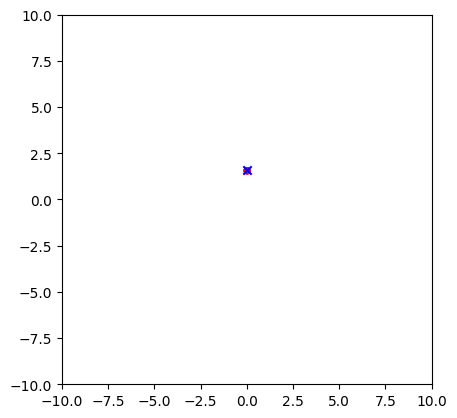

In [6]:
popsize = 50
pop = rng.uniform(low=-10, high=10, size=(popsize, 2))


animator = GAAnimator(
    f=lambda pop: f1(pop[:,0], pop[:,1]),
    pop=pop
)
ani = FuncAnimation(
    fig=animator.fig,
    func=animator.update,
    frames=50,
    init_func=animator.init_plot,
    blit=True,
)
ani

Optimal solution:

In [7]:
display(animator.pop[0], animator.fpop[0])

array([-0.01248862,  1.57888393])

8.106035488264853

$f_2(x,y) = -0.0001 \left( \left| \sin x  \sin y \exp \left(\left| 100-\frac{\sqrt{x^2+y^2}}{\pi} \right| \right) \right| + 1 \right)^{0.1}$

In [8]:
def f2(x,y):
    c = sin(x)*sin(y)*exp(abs(100-sqrt(x**2+y**2)/pi))
    return -0.0001 * (abs(c) + 1)**0.1

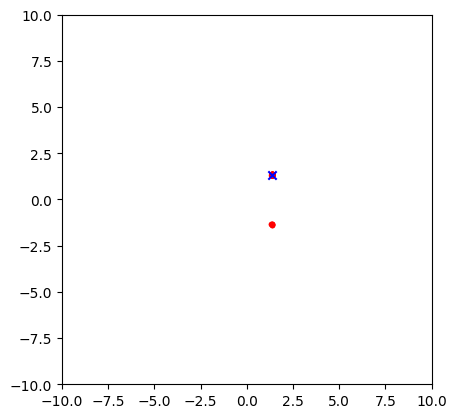

In [9]:
popsize = 50
pop = rng.uniform(low=-10, high=10, size=(popsize, 2))


animator = GAAnimator(
    f=lambda pop: -f2(pop[:,0], pop[:,1]), # -f2 because f2 -> min
    pop=pop
) 
ani = FuncAnimation(
    fig=animator.fig,
    func=animator.update,
    frames=50,
    init_func=animator.init_plot,
    blit=True,
)
ani

Optimal solution:

In [10]:
display(animator.pop[0], -animator.fpop[0])

array([1.34876044, 1.34868829])

-2.062611769613519